# Парсинг файлов log.txt

    Автор парсинга - Игорь Вайман
    Код: https://github.com/nj-vs-vh/sphere_telemetry_processing
    Данные на гуглодиске: https://drive.google.com/drive/folders/1ByZfb3ENKzgU7fGKNTepR2y0FOAxCaqs?usp=sharing

In [1]:
!date
!pwd
!ls ../../ExpData/Data.dbg/logs
#!ls ../../ExpData/Data.dbg/oldBoardComp

Ср сен 30 15:40:39 MSK 2020
/home/alena/SPHERE/Analysis/Collect_datum
log1.txt
log_ground_2012.03.12_to_2012.03.14.parsed.csv
log_ground_2012.03.12_to_2012.03.14.txt
log_ground_2012.03.14_to_2013.03.11.parsed.csv
log_ground_2012.03.14_to_2013.03.11.txt
log_ground_2012.03.15.parsed.csv
log_ground_2012.03.15.txt
log_ground_2013.03.10_to_2013.03.16.parsed.csv
log_ground_2013.03.10_to_2013.03.16.txt
log_onboard_2010.03.18_to_2012.03.12.parsed.csv
log_onboard_2010.03.18_to_2012.03.12.txt
log_onboard_2012.03.12_to_2012.03.14.parsed.csv
log_onboard_2012.03.12_to_2012.03.14.txt
log_onboard_2012.03.19_to_2012.03.27.parsed.csv
log_onboard_2012.03.19_to_2012.03.27.txt
log_onboard_2013.02.16_to_2013.03.16.parsed.csv
log_onboard_2013.02.16_to_2013.03.16.txt


In [5]:
import sphere_log_parser as slp

In [86]:
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
import pandas as pd
#чтобы датасеты с множеством колонок отображались полностью
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)

In [31]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 2
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.max_open_warning'] = 129

In [114]:
dirr = '../../ExpData/Data.dbg/logs/'
name = 'log_ground_2012.03.12_to_2012.03.14.parsed.csv'
name = 'log_ground_join.parsed.csv'
data = pd.read_csv(dirr+name, sep='\t', index_col=None)
data['date'] = data.datetime.apply(lambda x: x[:10])
data['time'] = data.datetime.apply(lambda x: x[11:])
data['year'] = data.datetime.apply(lambda x: x[:4])
data = data.drop(columns=["Unnamed: 0"])
print(data.shape)
data = data.drop_duplicates(subset=['datetime'], keep='last',ignore_index=True)
print(data.shape)
data

(632971, 33)
(591233, 33)


,datetime,N_lat,E_lon,H_m,GPS_stamp,Nsat,HDOP,P0_hPa,T0_C,P1_hPa,T1_C,P0_code,T0_code,P1_code,T1_code,Clin1,Clin2,Clin_theta,U15,U5,Uac,I,I_code,Tp_C,Tm_C,compass,Led_ch0,Led_ch1,Led_ch2,Led_ch3,date,time,year
0,2012-03-12 12:57:13,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,0.0,0.0,NaN,0.00,5.17,18.56,0.90,-1,27.25,0.0,NaN,-1,-1,-1,-1,2012-03-12,12:57:13,2012
1,2012-03-12 12:57:16,5147.8157,10423.3336,443.8,55543,9,1.0,NaN,NaN,NaN,NaN,-1,-1,-1,-1,0.0,0.0,NaN,0.00,5.16,18.56,0.91,-1,27.25,0.0,NaN,-1,-1,-1,-1,2012-03-12,12:57:16,2012
2,2012-03-12 12:57:19,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,-1,0.0,0.0,NaN,0.00,5.16,18.56,0.93,-1,27.25,0.0,NaN,-1,-1,-1,-1,2012-03-12,12:57:19,2012
3,2012-03-12 12:57:22,5147.8157,10423.3336,443.8,55550,9,1.0,NaN,NaN,NaN,NaN,-1,-1,-1,-1,0.0,0.0,NaN,0.00,5.16,18.56,0.91,-1,27.00,0.0,NaN,-1,-1,-1,-1,2012-03-12,12:57:22,2012
4,2012-03-12 12:57:25,5147.8157,10423.3336,443.8,55553,9,1.0,NaN,NaN,NaN,NaN,-1,-1,-1,-1,0.0,0.0,NaN,0.00,5.16,18.57,0.90,-1,27.00,0.0,NaN,-1,-1,-1,-1,2012-03-12,12:57:25,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591228,2013-03-16 08:36:12,5147.8091,10423.3317,454.9,233628,8,0.9,922.2,28.5,956.1,4.0,29202,30777,38552,33037,0.0,0.0,NaN,15.02,5.20,19.01,0.84,-1,43.00,0.0,NaN,-1,-1,-1,-1,2013-03-16,08:36:12,2013
591229,2013-03-16 08:36:15,5147.8091,10423.3318,454.9,233631,8,0.9,922.0,28.5,956.0,4.0,29198,30775,38546,33043,0.0,0.0,NaN,15.01,5.19,19.01,0.84,-1,43.25,0.0,NaN,-1,-1,-1,-1,2013-03-16,08:36:15,2013
591230,2013-03-16 08:36:19,5147.8091,10423.3318,454.9,233634,8,0.9,922.1,28.5,956.1,4.0,29201,30774,38553,33038,0.0,0.0,NaN,15.02,5.20,19.02,0.84,-1,43.00,0.0,NaN,-1,-1,-1,-1,2013-03-16,08:36:19,2013
591231,2013-03-16 08:36:22,5147.8091,10423.3318,454.9,233638,8,0.9,922.0,28.4,956.1,4.0,29199,30772,38551,33038,0.0,0.0,NaN,15.01,5.20,19.02,0.84,-1,43.25,0.0,NaN,-1,-1,-1,-1,2013-03-16,08:36:22,2013


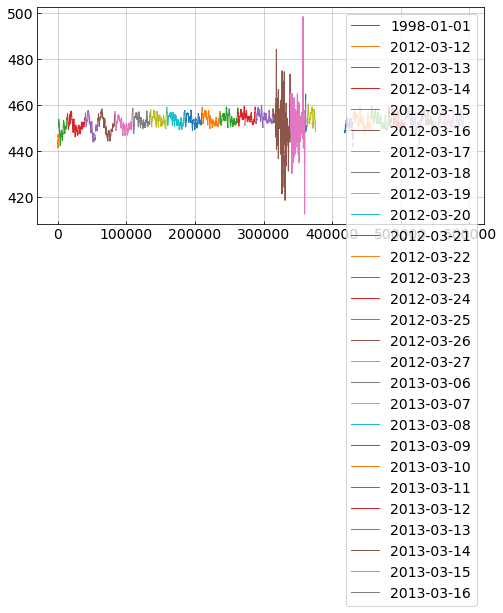

In [101]:
""" Высота """

data.groupby('date')['H_m'].plot(legend=True)
plt.grid()

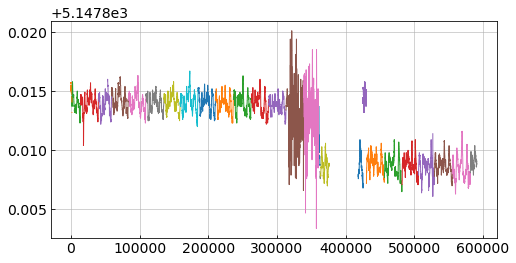

In [102]:
ig, ax = plt.subplots()
data.groupby('date')['N_lat'].plot(legend=False)
plt.grid()

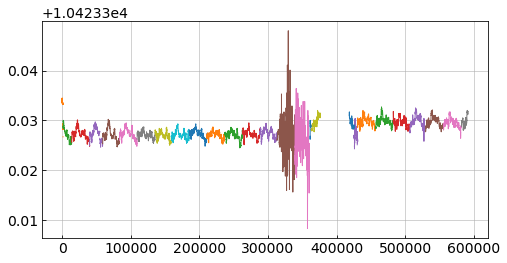

In [103]:
data.groupby('date')['E_lon'].plot(legend=False)
plt.grid()

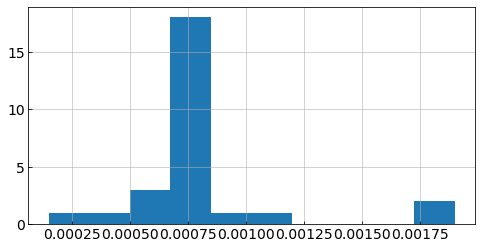

In [104]:
lat = data.groupby('date')['N_lat'].std()
lat.hist()
#lat

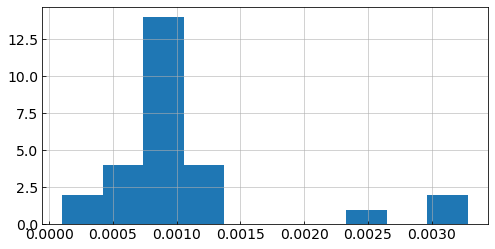

In [105]:
lon = data.groupby('date')['E_lon'].std()
lon.hist()

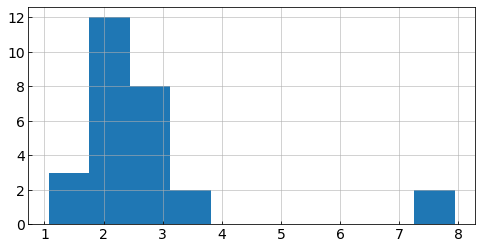

In [106]:
H = data.groupby('date')['H_m'].std()
H.hist()

In [107]:
print(lat.median() * 10000, lon.median() * 10000, H.median())

7.56921946773032 8.74388293371653 2.379069487637312


In [108]:
lat.median() * 1000 * 68.86 / 60

0.8686940875798496

In [109]:
lon.median() * 1000 * 68.86 / 60, 'm'

(1.0035062980262004, 'm')

## Суточные вариации

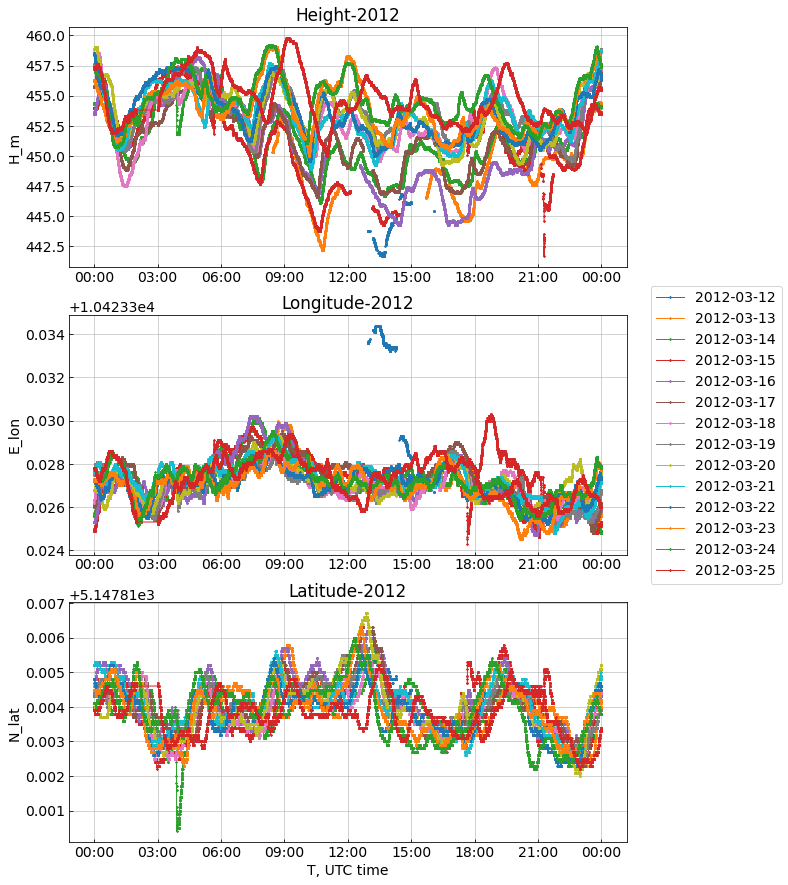

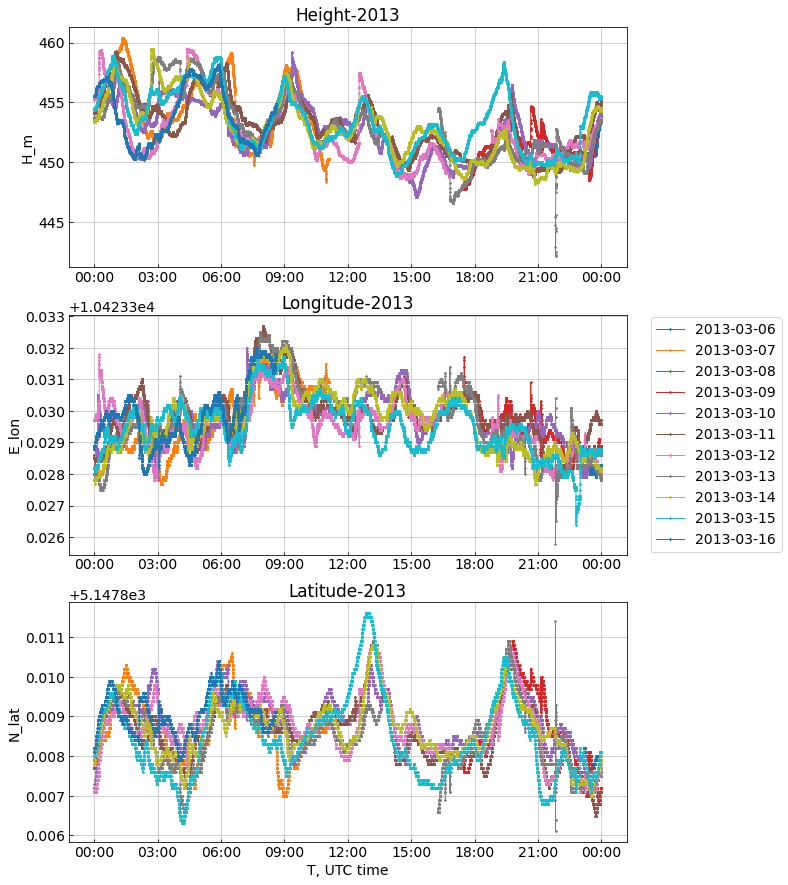

In [165]:
year = '2013'
for year in ['2012', '2013']:
    fig, axn = plt.subplots(3, 1, sharex=True, figsize=(10, 15))
    title = ['Height', "Longitude", "Latitude"]
    i = 0
    for param in ['H_m', 'E_lon', 'N_lat']:
        fmt = dates.DateFormatter('%H:%M')
        df = data[data.year == year]
        for date, frame in df.groupby('date'):
            if date == '2012-03-27' or date == '2012-03-26':
                continue
            x = [dt.datetime.strptime(i, "%H:%M:%S") for i in frame['time']]
            y = frame[param]
            axn[i].plot(x, y, '*-', label=date)
        axn[i].tick_params(labelbottom=True)
        axn[i].xaxis.set_major_formatter(fmt)  
        axn[i].set_ylabel(param)
        axn[i].set_title(title[i] + '-' + str(year))
        if(i == 1):
            axn[i].legend(loc="center right",  bbox_to_anchor=(1.29,0.5))
        axn[i].grid()
        i += 1
    axn[i-1].set_xlabel('T, UTC time')
    filename = 'GPS_variations_' + str(year)
    plt.savefig(filename + ".png", bbox_inches='tight') 

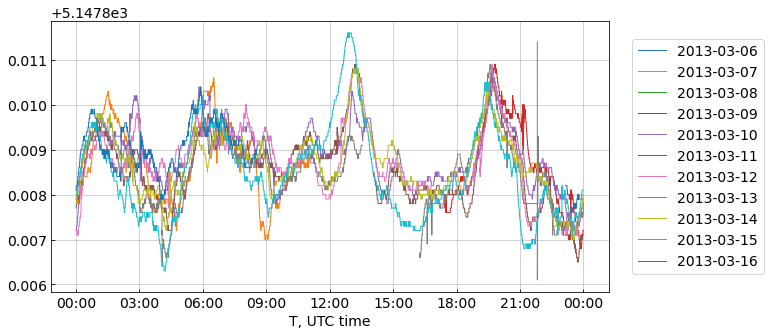

In [140]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fmt = dates.DateFormatter('%H:%M')
df = data[data.year == '2013']
for date, frame in df.groupby('date'):
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in frame['time']]
    y = frame.N_lat
    plt.plot(x, y,label=date)
ax.tick_params(labelbottom=True)
ax.xaxis.set_major_formatter(fmt)
plt.xlabel('T, UTC time')
plt.legend(loc="center right",  bbox_to_anchor=(1.29,0.5))
ax.grid()

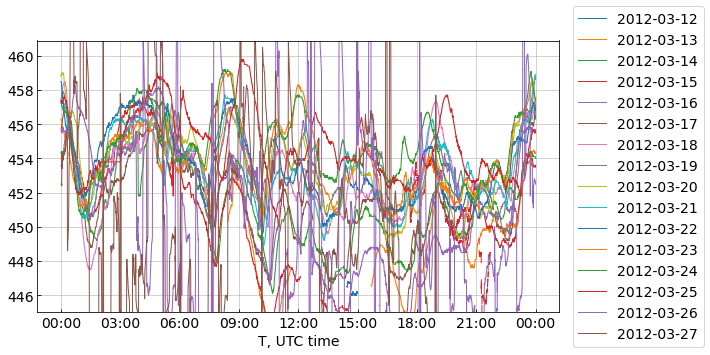

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fmt = dates.DateFormatter('%H:%M')
df = data[data.year == '2012']
for date, frame in df.groupby('date'):
    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in frame['time']]
    y = frame.H_m
    plt.plot(x, y,label=date)
ax.tick_params(labelbottom=True)
ax.xaxis.set_major_formatter(fmt)
plt.xlabel('T, UTC time')
plt.ylim(445, 460.9)
plt.legend(loc="center right",  bbox_to_anchor=(1.29,0.5))
plt.subplots_adjust(right=0.85)
ax.grid()